<a href="https://colab.research.google.com/github/jabir-al-nahian/Bidirectional-LSTM/blob/main/fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re,nltk,json, pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(42)
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
# Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# dataset path
dataset_path = '/content/drive/MyDrive/Colab Notebooks/ronok/'
path = '/content/drive/MyDrive/Colab Notebooks/ronok/'


#Importing Dataset

In [ ]:
# Read the data
data = pd.read_csv(dataset_path+'all-news.csv',encoding='utf-8')
print(f'Total number of Documents: {len(data)}')


Total number of Documents: 10507


In [ ]:
data

,domain,date,category,headline,content,label
0,http://www.allbanglanewspapersbd.com/samakal/,১৭ ফেব্রুয়ারি ২২ । ০০:০০,Sports,রোনালদোর অবাক করা গোল,﻿মঙ্গলবার রাতে প্যারিসে লিওনেল মেসি যখন পেনাল্...,real
1,http://www.allbanglanewspapersbd.com/samakal/,১৬ ফেব্রুয়ারি ২২ । ১০:২২,entertainment,"বঙ্গবন্ধুর ৭ মার্চের ভাষণ নিয়ে হবে সিনেমা, নাম...",﻿﻿জাতির পিতা বঙ্গবন্ধু শেখ মুজিবুর রহমানের ঐতি...,real
2,http://www.allbanglanewspapersbd.com/jugantor/,"১৭ ফেব্রুয়ারি ২০২২, ০১:০৫ পিএম",Covid-19 update,প্রাথমিকের শিক্ষার্থীদেরও টিকা দেওয়া হবে: শিক্...,মাধ্যমিকের পর এবার প্রাথমিকের শিক্ষার্থীদেরও ক...,real
3,http://www.allbanglanewspapersbd.com/jugantor/,"১৭ ফেব্রুয়ারি ২০২২, ১১:২৫ এএম",International,সৌদির সঙ্গে সংলাপ চলবে: এরদোগান,সৌদি আরবের সঙ্গে তুরস্কের সংলাপ চলমান থাকবে বল...,real
4,http://www.allbanglanewspapersbd.com/jugantor/,"১৭ ফেব্রুয়ারি ২০২২, ০২:২৪ পিএম",Sports,পুলিশের ৯ উইকেট নিলেন তন্ময়,৫০ ওভারের ম্যাচে অবিশ্বাস্য পারফরম করলেন বাঁহা...,real
...,...,...,...,...,...,...
10502,jagonews24.com,2018-09-23 11:12:27,National,তালাকের ৫ বছর পর শ্বশুরবাড়িতে প্রবাসীর মরদেহ,কুমিল্লার বুড়িচং উপজেলার এবদারপুর গ্রামে সাবেক...,real
10503,jagonews24.com,2018-09-24 13:36:25,National,বান্দরবানে পালিত হচ্ছে মধু পূর্ণিমা,নানা মাঙ্গলিক আয়োজনের মধ্যে দিয়ে বান্দরবানে পা...,real
10504,jagonews24.com,2018-09-23 19:36:27,National,মাজেদাকে ধরিয়ে দিয়ে ১০ হাজার টাকা পুরস্কার নিল...,নারায়ণগঞ্জের সিদ্ধিরগঞ্জে শীর্ষ মাদক ব্যবসায়ী ...,real
10505,independent24.com,2018-09-21 14:26:51,National,মন্ত্রিসভায় চূড়ান্ত অনুমোদনের অপেক্ষায় টেলিযোগ...,২০ বছরের পুরনো নীতিমালা দিয়েই চলছে দেশের টেলিয...,real


In [ ]:
data = data[['headline','label']]

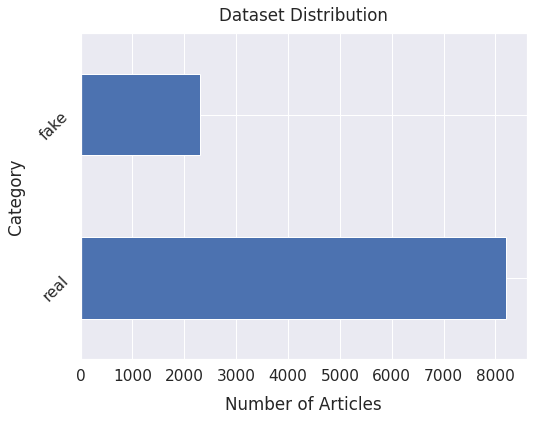

In [ ]:
# Plot the Class distribution
sns.set(font_scale=1.4)
data['label'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Number of Articles", labelpad=12)
plt.ylabel("Category", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

The dataset has total 12 News Categories data and politics class has maximum number of articles.

#Data Preparation and Cleaning

In [ ]:
# Cleaning Data [Remove unncessary symbols]
def cleaning_documents(articles):
      '''
      This function will clean the news articles by removing punctuation marks and stopwords.

      Args:
      articles: a news text(str)

      returns:
      news: clean text (str)
      '''
      news = articles.replace('\n',' ')
      news = re.sub('[^\u0980-\u09FF]',' ',str(news)) #removing unnecessary punctuation
      # stopwords removal
      stp = open(path+'bangla_stopwords.txt','r',encoding='utf-8').read().split()
      result = news.split()
      news = [word.strip() for word in result if word not in stp ]
      news =" ".join(news)
      return news

In [ ]:
# Apply the function into the dataframe
data['cleaned'] = data['headline'].apply(cleaning_documents)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data

,headline,label,cleaned
0,রোনালদোর অবাক করা গোল,real,রোনালদোর অবাক গোল
1,"বঙ্গবন্ধুর ৭ মার্চের ভাষণ নিয়ে হবে সিনেমা, নাম...",real,বঙ্গবন্ধুর ৭ মার্চের ভাষণ সিনেমা নাম মাইক
2,প্রাথমিকের শিক্ষার্থীদেরও টিকা দেওয়া হবে: শিক্...,real,প্রাথমিকের শিক্ষার্থীদেরও টিকা শিক্ষামন্ত্রী
3,সৌদির সঙ্গে সংলাপ চলবে: এরদোগান,real,সৌদির সংলাপ চলবে এরদোগান
4,পুলিশের ৯ উইকেট নিলেন তন্ময়,real,পুলিশের ৯ উইকেট নিলেন তন্ময়
...,...,...,...
10502,তালাকের ৫ বছর পর শ্বশুরবাড়িতে প্রবাসীর মরদেহ,real,তালাকের ৫ বছর শ্বশুরবাড়িতে প্রবাসীর মরদেহ
10503,বান্দরবানে পালিত হচ্ছে মধু পূর্ণিমা,real,বান্দরবানে পালিত মধু পূর্ণিমা
10504,মাজেদাকে ধরিয়ে দিয়ে ১০ হাজার টাকা পুরস্কার নিল...,real,মাজেদাকে ধরিয়ে দিয়ে ১০ টাকা পুরস্কার নিল
10505,মন্ত্রিসভায় চূড়ান্ত অনুমোদনের অপেক্ষায় টেলিযোগ...,real,মন্ত্রিসভায় চূড়ান্ত অনুমোদনের অপেক্ষায় টেলিযোগ...


In [ ]:
# print some cleaned documents from the dataset
sample_data = [1000,2000,3000,4000,5000,10000]
for i in sample_data:
  print('Original:\n',data.headline[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Category:-- ',data.label[i],'\n')

Original:
 ওস্তাদের নির্দেশে আইএসরে গালি দেই: জোকাই লামা 
Cleaned:
 ওস্তাদের নির্দেশে আইএসরে গালি দেই জোকাই লামা 
 Category:--  fake 

Original:
 তীব্র গরমে যুবককে জ্যাকেট পড়ানোর ভয় দেখিয়ে মোহাম্মদপুরে ছিনতাই - Bengal Beats 
Cleaned:
 তীব্র গরমে যুবককে জ্যাকেট পড়ানোর ভয় দেখিয়ে মোহাম্মদপুরে ছিনতাই 
 Category:--  fake 

Original:
 প্রেম করলে বাড়বে ওজন! 
Cleaned:
 প্রেম বাড়বে ওজন 
 Category:--  fake 

Original:
 নাইক্ষ্যংছ‌ড়ি‌তে ‘বন্দুকযু‌দ্ধে’ ডাকাত নিহত 
Cleaned:
 নাইক্ষ্যংছ ড়ি তে বন্দুকযু দ্ধে ডাকাত নিহত 
 Category:--  real 

Original:
 শেখ হাসিনার অধীনে কোনো নির্বাচন নয় : দুদু 
Cleaned:
 শেখ হাসিনার অধীনে নির্বাচন দুদু 
 Category:--  real 

Original:
 ঢাবির ভর্তি পরীক্ষায় জালিয়াতি: আটক ২ 
Cleaned:
 ঢাবির ভর্তি পরীক্ষায় জালিয়াতি আটক ২ 
 Category:--  real 



In [ ]:
# Stopwords pickle
stp = open(path+'bangla_stopwords.txt','r',encoding='utf-8').read().split()
# open a file, where you ant to store the data
file = open(path+'bangla_stopwords.pkl', 'wb')
# dump information to that file
pickle.dump(stp, file)

In [ ]:
stp = open(path+'bangla_stopwords.pkl','rb')
stp = pickle.load(stp)
len(stp)

398

## Handle Low Length Documents

In [ ]:
# Calculate the Length of each Document
data['Length'] = data.cleaned.apply(lambda x:len(x.split()))

# Remove the Documents with least words
dataset = data.loc[data.Length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Documents".format(len(data)-len(dataset)),
      "\nTotal Remaining Documents:",len(dataset))

After Cleaning: 
Removed 186 Small Documents 
Total Remaining Documents: 10321


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataset

,headline,label,cleaned,Length
0,রোনালদোর অবাক করা গোল,real,রোনালদোর অবাক গোল,3
1,"বঙ্গবন্ধুর ৭ মার্চের ভাষণ নিয়ে হবে সিনেমা, নাম...",real,বঙ্গবন্ধুর ৭ মার্চের ভাষণ সিনেমা নাম মাইক,7
2,প্রাথমিকের শিক্ষার্থীদেরও টিকা দেওয়া হবে: শিক্...,real,প্রাথমিকের শিক্ষার্থীদেরও টিকা শিক্ষামন্ত্রী,4
3,সৌদির সঙ্গে সংলাপ চলবে: এরদোগান,real,সৌদির সংলাপ চলবে এরদোগান,4
4,পুলিশের ৯ উইকেট নিলেন তন্ময়,real,পুলিশের ৯ উইকেট নিলেন তন্ময়,5
...,...,...,...,...
10316,তালাকের ৫ বছর পর শ্বশুরবাড়িতে প্রবাসীর মরদেহ,real,তালাকের ৫ বছর শ্বশুরবাড়িতে প্রবাসীর মরদেহ,6
10317,বান্দরবানে পালিত হচ্ছে মধু পূর্ণিমা,real,বান্দরবানে পালিত মধু পূর্ণিমা,4
10318,মাজেদাকে ধরিয়ে দিয়ে ১০ হাজার টাকা পুরস্কার নিল...,real,মাজেদাকে ধরিয়ে দিয়ে ১০ টাকা পুরস্কার নিল,7
10319,মন্ত্রিসভায় চূড়ান্ত অনুমোদনের অপেক্ষায় টেলিযোগ...,real,মন্ত্রিসভায় চূড়ান্ত অনুমোদনের অপেক্ষায় টেলিযোগ...,6


In [ ]:
# Save the Cleaned data for reuse
dataset.to_csv(dataset_path+'cleaned_news.csv')

In [ ]:
# Load the Cleaned News
dataset = pd.read_csv(dataset_path+'cleaned_news.csv')
dataset.columns

Index(['Unnamed: 0', 'headline', 'label', 'cleaned', 'Length'], dtype='object')

In [ ]:
dataset

,Unnamed: 0,headline,label,cleaned,Length
0,0,রোনালদোর অবাক করা গোল,real,রোনালদোর অবাক গোল,3
1,1,"বঙ্গবন্ধুর ৭ মার্চের ভাষণ নিয়ে হবে সিনেমা, নাম...",real,বঙ্গবন্ধুর ৭ মার্চের ভাষণ সিনেমা নাম মাইক,7
2,2,প্রাথমিকের শিক্ষার্থীদেরও টিকা দেওয়া হবে: শিক্...,real,প্রাথমিকের শিক্ষার্থীদেরও টিকা শিক্ষামন্ত্রী,4
3,3,সৌদির সঙ্গে সংলাপ চলবে: এরদোগান,real,সৌদির সংলাপ চলবে এরদোগান,4
4,4,পুলিশের ৯ উইকেট নিলেন তন্ময়,real,পুলিশের ৯ উইকেট নিলেন তন্ময়,5
...,...,...,...,...,...
10316,10316,তালাকের ৫ বছর পর শ্বশুরবাড়িতে প্রবাসীর মরদেহ,real,তালাকের ৫ বছর শ্বশুরবাড়িতে প্রবাসীর মরদেহ,6
10317,10317,বান্দরবানে পালিত হচ্ছে মধু পূর্ণিমা,real,বান্দরবানে পালিত মধু পূর্ণিমা,4
10318,10318,মাজেদাকে ধরিয়ে দিয়ে ১০ হাজার টাকা পুরস্কার নিল...,real,মাজেদাকে ধরিয়ে দিয়ে ১০ টাকা পুরস্কার নিল,7
10319,10319,মন্ত্রিসভায় চূড়ান্ত অনুমোদনের অপেক্ষায় টেলিযোগ...,real,মন্ত্রিসভায় চূড়ান্ত অনুমোদনের অপেক্ষায় টেলিযোগ...,6


#Document Length Distribution

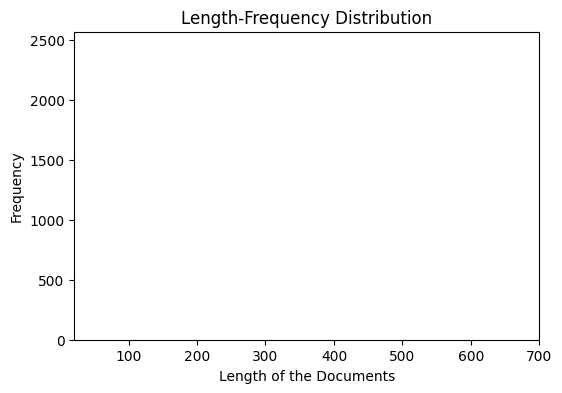

Maximum Length of a Document: 135
Minimum Length of a Document: 3
Average Length of a Document: 6.0


In [ ]:
import matplotlib
matplotlib.rc_file_defaults()
frequency = dict()
for i in dataset.Length:
    frequency[i] = frequency.get(i, 0)+1

plt.figure(figsize = (6,4))
plt.bar(frequency.keys(), frequency.values(), color=(0.2, 0.4, 0.6, 0.6))
plt.xlim(21, 700)
# in this notbook color is not working but it should work.
plt.xlabel('Length of the Documents')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
#plt.savefig(path+'len_dist.png',dpi = 1000,bbox_inches ='tight')
plt.show()
print(f"Maximum Length of a Document: {max(dataset.Length)}")
print(f"Minimum Length of a Document: {min(dataset.Length)}")
print(f"Average Length of a Document: {round(np.mean(dataset.Length),0)}")


# Dataset Summary

In [ ]:
def data_summary(dataset):
  '''
  This function will print the summary of the dataset

  Args:
  dataset: cleaned texts

  returns:
  documents: Number of document per class
  words: Number of words per class
  u_words: Number of unique words per class
  class_label: name of the categories
  '''
  documents = []
  words = []
  u_words = []
  #total_u_word = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
  # find class names
  class_label = [k for k,v in dataset.label.value_counts().to_dict().items()]
  for label in class_label:
    word_list = [word.strip().lower() for t in list(dataset[dataset.label==label].cleaned) for word in t.strip().split()]
    counts = dict()
    for word in word_list:
      counts[word] = counts.get(word, 0)+1
    # sort the dictionary of word list
    ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
    # Documents per class
    documents.append(len(list(dataset[dataset.label==label].cleaned)))
    # Total Word per class
    words.append(len(word_list))
    # Unique words per class
    u_words.append(len(np.unique(word_list)))

    print("\nClass Name : ",label)
    print("Number of Documents:{}".format(len(list(dataset[dataset.label==label].cleaned))))
    print("Number of Words:{}".format(len(word_list)))
    print("Number of Unique Words:{}".format(len(np.unique(word_list))))
    print("Most Frequent Words:\n")
    for k,v in ordered[:10]:
      print("{}\t{}".format(k,v))
  return documents,words,u_words,class_label

# pass the whole dataset into the function

documents,words,u_words,class_names = data_summary(dataset)


Class Name :  real
Number of Documents:8043
Number of Words:45983
Number of Unique Words:11578
Most Frequent Words:

নিহত	331
বাংলাদেশ	221
আটক	204
মৃত্যু	201
৩	194
বিএনপি	153
২	153
সেপ্টেম্বর	149
উদ্ধার	148
প্রধানমন্ত্রী	125

Class Name :  fake
Number of Documents:2278
Number of Words:16636
Number of Unique Words:5184
Most Frequent Words:

দৈনিক	213
মতিকণ্ঠ	213
এক	100
হয়ে	74
যেভাবে	52
কারণে	50
সাথে	49
১০টি	47
দিয়ে	45
টাকা	43


In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
data_matrix

,Total Documents,Total Words,Unique Words,Class Names
0,8043,45983,11578,real
1,2278,16636,5184,fake


## Data Summary Visualization

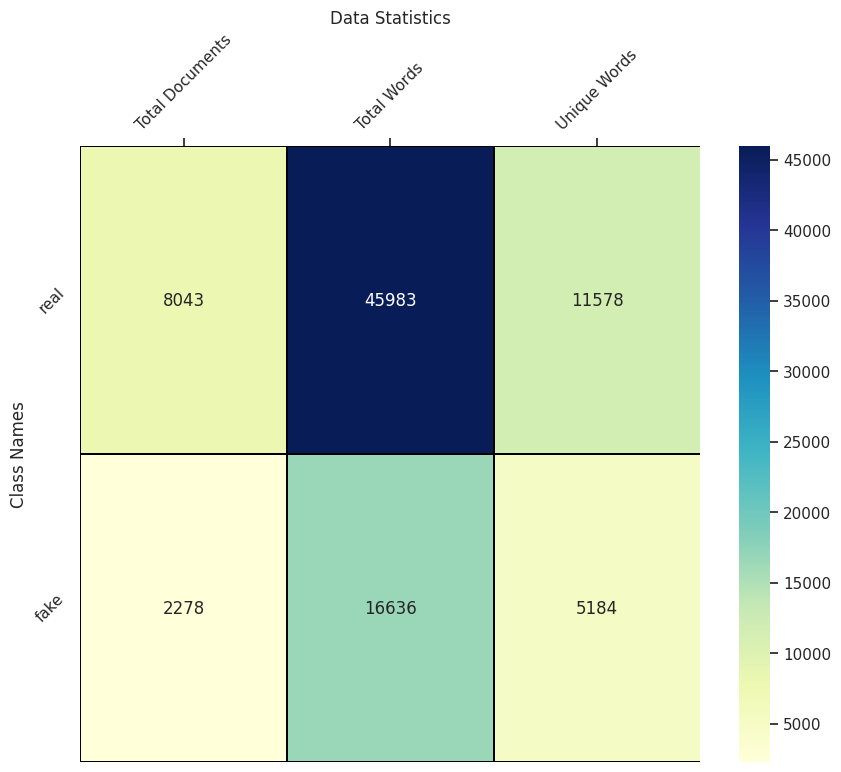

In [ ]:
sns.set()
plt.figure(figsize =(10, 8))
ax = plt.subplot()
sns.heatmap(data_matrix.iloc[:,0:3], annot=True,fmt="d", linewidths=0.5,linecolor = 'Black',cmap = "YlGnBu",ax = ax)
# labels, title and ticks
ax.set_ylabel('Class Names')
ax.set_title('Data Statistics')
y_label = ["Total Documents", "Total Words", "Unique Words"]
ax.xaxis.set_ticklabels(y_label, rotation=45); ax.yaxis.set_ticklabels(class_names, rotation=45);
ax.xaxis.tick_top()


#Label Encoding and Dataset Splitting

In [ ]:
                   #===========================================================
                   ################# Label Encoding Function ##################
                   #===========================================================
def label_encoding(dataset,bool):
  '''
  This function will convert categorical class names into a numeric label

  Args:
  dataset: A dataset
  bool : a boolean (True or False)

  returns:
  labels: encoded labels
  '''
  le = LabelEncoder()
  le.fit(dataset.label)
  encoded_labels = le.transform(dataset.label)
  labels = np.array(encoded_labels) # Converting into numpy array
  class_names =le.classes_ ## Define the class names again
  if bool == True:
    print(color.BOLD+"\n\t\t\t===== Label Encoding ====="+color.END,"\nClass Names:-->",le.classes_)
  return labels

                   #===========================================================
                   ################# Dataset Splitting Function ###############
                   #===========================================================

def dataset_split(news,label):
  '''
  This function will split the dataset into Train-Test-Validation set

  Args:
  news: encoded texts
  category: class names

  returns:
  X_train: Encoded Training News
  X_valid: Encoded Validation News
  X_test:  Encoded Test news
  y_train: Encoded Training labels
  y_valid: Encoded Validation labels
  y_test:  Encoded Test labels
  '''

  X,X_test,y,y_test = train_test_split(news,label,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
  X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
  print(color.BOLD+"Feature Size :======>"+color.END,X_train.shape[1])
  print(color.BOLD+"\nDataset Distribution:\n"+color.END)
  print("\tSet Name","\t\tSize")
  print("\t========\t\t======")

  print("\tFull\t\t\t",news.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0],
        "\n\tValidation\t\t",X_valid.shape[0])

  return X_train,X_valid,X_test,y_train,y_valid,y_test


#Tokenizer

In [ ]:
def encoded_texts(dataset,padding_length,max_words):

  '''
  This function will encoded the text into a sequence of numbers

  Args:
  dataset: a dataset
  padding_length: maximum length of a encoded texte
  max_words : Number of words

  returns:
  corpus: Number of encoded texts
  labels: encoded labels
  '''

  tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-',
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)



 # Fit the tokenizer
  tokenizer.fit_on_texts(dataset.cleaned)
  #============================== Tokenizer Info =================================
  (word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
  def tokenizer_info(mylist,bool):
    ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
    for w,c in ordered[:10]:
      print(w,"\t",c)
  #=============================== Print all the information =========================
  print(color.BOLD+"\t\t\t====== Tokenizer Info ======"+color.END)
  print("Words --> Counts:")
  tokenizer_info(word_counts,bool =True )
  print("\nWords --> Documents:")
  tokenizer_info(word_docs,bool =True )
  print("\nWords --> Index:")
  tokenizer_info(word_index,bool =True )
  print("\nTotal Documents -->",document_count)

  #=========================== Convert string into list of integer indices =================
  sequences = tokenizer.texts_to_sequences(dataset.cleaned)
  word_index = tokenizer.word_index
  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\nFound {} unique tokens".format(len(word_index)))
  print(dataset.cleaned[10],"\n",sequences[10])

  #==================================== Pad Sequences ==============================
  corpus = keras.preprocessing.sequence.pad_sequences(sequences, value=0.0,
                                                      padding='post', maxlen= padding_length)
  print("\n\t\t\t====== Paded Sequences ======\n",dataset.cleaned[10],"\n",corpus[10])

  #=================================     Label Encoding ================================
  labels = label_encoding(dataset,True)

   # save the tokenizer into a pickle file
  with open(path+'tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

  return corpus,labels

#call the function
num_words = 5000
corpus,labels = encoded_texts(dataset,
                                300,num_words)
print("\nShape of Encoded Corpus =====>",corpus.shape)

			====== Tokenizer Info ======
Words --> Counts:
নিহত 	 340
বাংলাদেশ 	 243
আটক 	 226
দৈনিক 	 214
মতিকণ্ঠ 	 213
মৃত্যু 	 202
৩ 	 202
এক 	 190
বিএনপি 	 169
২ 	 161

Words --> Documents:
নিহত 	 340
বাংলাদেশ 	 243
আটক 	 226
দৈনিক 	 214
মতিকণ্ঠ 	 213
মৃত্যু 	 201
৩ 	 200
এক 	 184
বিএনপি 	 169
২ 	 160

Words --> Index:
মাজেদাকে 	 14294
মধু 	 14293
শার্কের 	 14292
পর্যটনস্থলে 	 14291
গৃহবধূসহ 	 14290
কর্ণফুলী 	 14289
সর্বোচ্চ 	 14288
দপ্তরের 	 14287
রূপসায় 	 14286
কুয়াংয়ের 	 14285

Total Documents --> 10321

			====== Encoded Sequences ====== 
Found 14294 unique tokens
মান্নার ১৪তম মৃত্যুবার্ষিকী 
 [3786, 1, 2928]

			====== Paded Sequences ======
 মান্নার ১৪তম মৃত্যুবার্ষিকী 
 [3786    1 2928    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    

In [ ]:
dataset

,Unnamed: 0,headline,label,cleaned,Length
0,0,রোনালদোর অবাক করা গোল,real,রোনালদোর অবাক গোল,3
1,1,"বঙ্গবন্ধুর ৭ মার্চের ভাষণ নিয়ে হবে সিনেমা, নাম...",real,বঙ্গবন্ধুর ৭ মার্চের ভাষণ সিনেমা নাম মাইক,7
2,2,প্রাথমিকের শিক্ষার্থীদেরও টিকা দেওয়া হবে: শিক্...,real,প্রাথমিকের শিক্ষার্থীদেরও টিকা শিক্ষামন্ত্রী,4
3,3,সৌদির সঙ্গে সংলাপ চলবে: এরদোগান,real,সৌদির সংলাপ চলবে এরদোগান,4
4,4,পুলিশের ৯ উইকেট নিলেন তন্ময়,real,পুলিশের ৯ উইকেট নিলেন তন্ময়,5
...,...,...,...,...,...
10316,10316,তালাকের ৫ বছর পর শ্বশুরবাড়িতে প্রবাসীর মরদেহ,real,তালাকের ৫ বছর শ্বশুরবাড়িতে প্রবাসীর মরদেহ,6
10317,10317,বান্দরবানে পালিত হচ্ছে মধু পূর্ণিমা,real,বান্দরবানে পালিত মধু পূর্ণিমা,4
10318,10318,মাজেদাকে ধরিয়ে দিয়ে ১০ হাজার টাকা পুরস্কার নিল...,real,মাজেদাকে ধরিয়ে দিয়ে ১০ টাকা পুরস্কার নিল,7
10319,10319,মন্ত্রিসভায় চূড়ান্ত অনুমোদনের অপেক্ষায় টেলিযোগ...,real,মন্ত্রিসভায় চূড়ান্ত অনুমোদনের অপেক্ষায় টেলিযোগ...,6


#Call Dataset Split Function

In [ ]:
X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(corpus,labels)

Feature Size :======> 300

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 10321 
	Training		 7430 
	Test			 1033 
	Validation		 1858


#Model Defination

In [ ]:

embedding_dimension = 128
input_length = 300
vocab_size = 5000
num_classes = 2
batch_size = 64
num_epochs = 10

accuracy_threshold = 0.97


class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = path+"Model.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]

                            ###############################     CNN network architecture ################
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, embedding_dimension, input_length = input_length),
tf.keras.layers.Conv1D(128, 5, activation= 'relu'),
tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(64, return_sequences=True,dropout = 0.2)),
tf.keras.layers.Bidirectional(LSTM(64, return_sequences=True,dropout = 0.2)),
tf.keras.layers.Dense(28, activation='relu'),
tf.keras.layers.Dense(14, activation='relu'),
keras.layers.Flatten(),
tf.keras.layers.Dense(num_classes , activation='softmax')])

model.summary()

model.compile(optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(X_train,
    y_train,
    epochs=num_epochs,
    batch_size = batch_size,
    validation_data=(X_valid, y_valid),
    verbose =1)
    #callbacks = callback_list)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          640000    
                                                                 
 conv1d (Conv1D)             (None, 296, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 59, 128)          0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 59, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 59, 128)          98816     
 nal)                                                            
                                                        

In [ ]:
# save the model
tf.keras.models.save_model(model, path+'Document.h5', save_format='h5')
model.save(path+'Document_Categorization.h5')

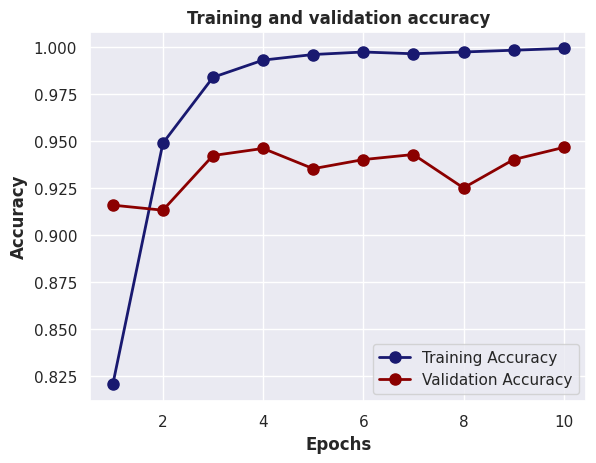

In [ ]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
sns.set_style('darkgrid')
                  #=========================================================
                  ############### Epochs vs Validation Accuracy Plot ##########
                  #==========================================================

plt.plot(epochs, acc, color='midnightblue', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.plot(epochs, val_acc, color='darkred', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.title('Training and validation accuracy',fontsize=12,fontweight='bold')
plt.xlabel('Epochs',fontsize=12,fontweight='bold')
plt.ylabel('Accuracy',fontsize=12,fontweight='bold')
plt.legend(['Training Accuracy','Validation Accuracy'])

From the **accuracy plot** it is observed that, the validation accuracy not improved more than 85%, it is due to multiclass imbalanced classification probelm. Moreover by proper tunning the vocabulary size the model perfoemance can be improved.

# Model Performance on Test Set

In [ ]:
# Load the saved model
model = load_model(path+'Document_Categorization.h5')

In [ ]:
class_names = ['fake' ,'real']
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred, output_dict=True)).transpose()
report = report.rename(index={'0': 'fake','1':'real'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
fake,88.24,82.57,85.31,218.000000
real,95.42,97.06,96.23,815.000000
accuracy,94.00,94.00,94.00,0.939981
macro avg,91.83,89.81,90.77,1033.000000
weighted avg,93.90,94.00,93.92,1033.000000


By observing precision,recall and f1-score we can see that all the classes are classified reasonably well except **Art and Environment.**

## Confusion Matrix

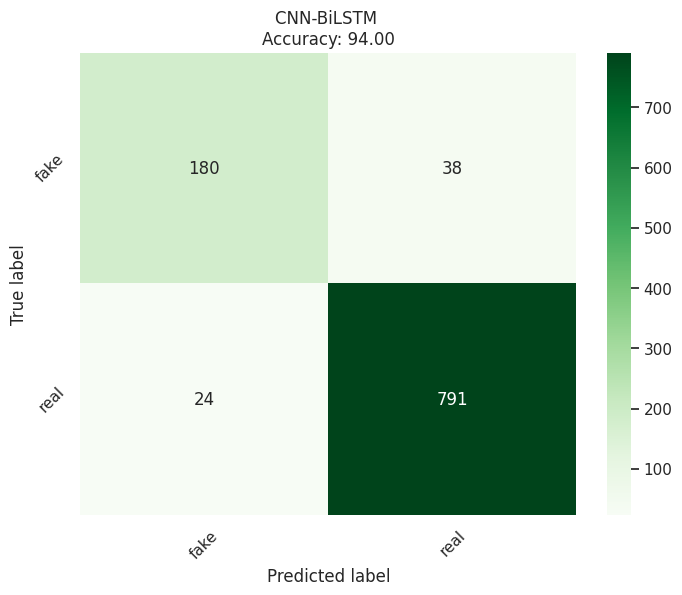

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred)

class_names = ['fake' ,'real']
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = class_names,
                     columns = class_names)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="Greens", fmt='g')
plt.title('CNN-BiLSTM \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, y_pred)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()


The confusion matrix provides a good understanding about how many documents are correctly classified in each class and which classes get confused during classification. Here, we can see that Art, Entertainment, Politics category gives larger number of false classified result.  

## Test with our own news

In [ ]:
sample_news = 'অবশেষে জানা গেল ‘নাবিলা জানো’ পোস্টারের রহস্য!'
cleaned_news = cleaning_documents(sample_news)

class_names = ['fake' ,'real']

#print(cleaned_news)
# load the saved tokenizer
with open(path+'tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)
#print(len(loaded_tokenizer.word_index))
seq= loaded_tokenizer.texts_to_sequences([cleaned_news])
padded = pad_sequences(seq, value=0.0,padding='post', maxlen= 300 )
pred = model.predict(padded)
#print(pred)
class_names[np.argmax(pred)]


'real'

In [ ]:
# print top most classes
y_pred = pred.reshape(-1)
class_labels=[(class_names[i],round(prob*100,2)) for i,prob in enumerate(y_pred) if prob > 0.1]

for k, v in class_labels:
  print(k,'====>',v,'%')

fake ====> 40.91 %
real ====> 59.09 %


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,Bidirectional, Dense,Dropout

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras import layers

In [ ]:
voc_size = 20000

sent_length=300

In [ ]:
embedding_dim = 90

model2 = Sequential()
model2.add(layers.Embedding(voc_size, embedding_dim, input_length=sent_length))
model2.add(layers.Conv1D(128,5, activation='relu'))
model2.add(layers.GlobalMaxPooling1D())
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(2, activation='sigmoid'))
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 300, 90)           1800000   
                                                                 
 conv1d_2 (Conv1D)           (None, 296, 128)          57728     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
 dense_7 (Dense)             (None, 2)                 22        
                                                                 
Total params: 1,859,040
Trainable params: 1,859,040
Non-trainable params: 0
____________________________________________

In [ ]:
model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=128)

Epoch 1/10
59/59 [==============================] - 3s 19ms/step - loss: 0.4916 - accuracy: 0.7833 - val_loss: 0.3392 - val_accuracy: 0.8867
Epoch 2/10
59/59 [==============================] - 1s 14ms/step - loss: 0.2031 - accuracy: 0.9347 - val_loss: 0.1835 - val_accuracy: 0.9361
Epoch 3/10
59/59 [==============================] - 1s 13ms/step - loss: 0.0778 - accuracy: 0.9773 - val_loss: 0.1797 - val_accuracy: 0.9342
Epoch 4/10
59/59 [==============================] - 1s 13ms/step - loss: 0.0366 - accuracy: 0.9898 - val_loss: 0.1895 - val_accuracy: 0.9380
Epoch 5/10
59/59 [==============================] - 1s 14ms/step - loss: 0.0166 - accuracy: 0.9958 - val_loss: 0.2257 - val_accuracy: 0.9255
Epoch 6/10
59/59 [==============================] - 1s 12ms/step - loss: 0.0091 - accuracy: 0.9978 - val_loss: 0.2306 - val_accuracy: 0.9342
Epoch 7/10
59/59 [==============================] - 1s 11ms/step - loss: 0.0051 - accuracy: 0.9988 - val_loss: 0.2519 - val_accuracy: 0.9293
Epoch 8/10
59

In [ ]:
from tensorflow.keras.layers import Embedding,SpatialDropout1D

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,Bidirectional, Dense,Dropout

embedding_vector_features=128
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(SpatialDropout1D(0.4))
model1.add(Bidirectional(LSTM(256)))
model1.add(Dropout(0.2))
model1.add(Dense(2,activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 128)          2560000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 128)         0         
 ropout1D)                                                       
                                                                 
 bidirectional_2 (Bidirectio  (None, 512)              788480    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 3,349,506
Trainable params: 3,349,506
No

In [ ]:
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=128)

Epoch 1/10
59/59 [==============================] - 5s 85ms/step - loss: 0.0405 - accuracy: 0.9873 - val_loss: 0.2258 - val_accuracy: 0.9322
Epoch 2/10
59/59 [==============================] - 5s 84ms/step - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.2470 - val_accuracy: 0.9342
Epoch 3/10
59/59 [==============================] - 5s 84ms/step - loss: 0.0631 - accuracy: 0.9810 - val_loss: 0.2184 - val_accuracy: 0.9361
Epoch 4/10
59/59 [==============================] - 5s 84ms/step - loss: 0.0224 - accuracy: 0.9931 - val_loss: 0.2967 - val_accuracy: 0.9313
Epoch 5/10
59/59 [==============================] - 5s 84ms/step - loss: 0.0153 - accuracy: 0.9953 - val_loss: 0.3302 - val_accuracy: 0.9264
Epoch 6/10
59/59 [==============================] - 5s 85ms/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.3634 - val_accuracy: 0.9303
Epoch 7/10
59/59 [==============================] - 5s 84ms/step - loss: 0.0079 - accuracy: 0.9981 - val_loss: 0.4212 - val_accuracy: 0.9284
Epoch 8/10
59